# Aspect Ratio Filtering

We're going to do a quick demo on computing aspect ratio and how you could integrate it into a heuristic for ranking your contours. 

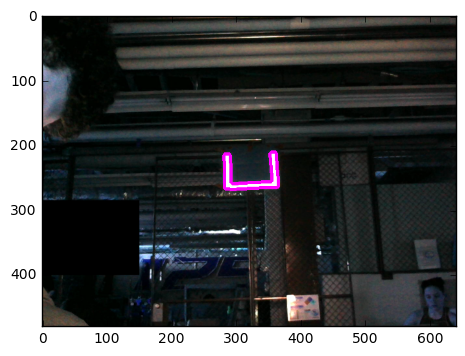

In [39]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import math

image = cv2.imread("images/14_00_640.png")
imgray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(imgray,127,255,0)
contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
def getAspectRatio(contour):
    (_,_,h, w) = cv2.boundingRect(contour)
    return float(w)/h

def getAspectRatioError(contour, targetRatio):
    return math.fabs(getAspectRatio(contour) - targetRatio)

contours = sorted(contours, key=lambda x: getAspectRatioError(x, 0.69), reverse=False)
cv2.drawContours(image,contours,0,(255,0,255),3)
plt.imshow(image)